In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
import sys, os

In [2]:
df = pd.read_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'def_nac_y_com_20-21.csv'), sep = '\t')
df

,Comunidades autónomas,Tipo de dato,Periodo,Total
0,Total Nacional,Dato base,2021SM38,7.023
1,Total Nacional,Dato base,2021SM37,7.489
2,Total Nacional,Dato base,2021SM36,8.003
3,Total Nacional,Dato base,2021SM35,7.994
4,Total Nacional,Dato base,2021SM34,8.356
...,...,...,...,...
90715,19 Melilla,Variación con respecto a 2019 del acumulado en...,2000SM05,NaN
90716,19 Melilla,Variación con respecto a 2019 del acumulado en...,2000SM04,NaN
90717,19 Melilla,Variación con respecto a 2019 del acumulado en...,2000SM03,NaN
90718,19 Melilla,Variación con respecto a 2019 del acumulado en...,2000SM02,NaN


In [4]:
new = df[(df['Tipo de dato'] == 'Dato base') & (df['Comunidades autónomas'] != 'Total Nacional')]
new['Total'] = new['Total'].astype(str)

nuevo = []
for i in new['Total']:
    i = i.replace('.', '')
    nuevo.append(i)
new['Total'] = nuevo
new['Total'] = new['Total'].astype(int)

letra = []
for i in new['Comunidades autónomas']:
    i = i.lstrip('0123456789 ')
    letra.append(i)
new['Comunidades autónomas'] = letra

total = new.groupby('Comunidades autónomas', as_index=False)['Total'].sum()
total = total.sort_values(by = 'Total', ascending = True)
total['latitude'] = ['35.2919', '35.8883', '42.4658', '42.818', '43.2', '39.5341789', '37.9835', '39.4762', '43.36029', '41.6563', '28.09973', '39.8568', '43.257', '42.60003', '43.37135', '39.4702', '40.4165', '41.5911589', '37.3826']
total['longitude'] = ['-2.93848', '-5.3162', '-2.44999', '-1.64421', '-4.03333', '2.8577105', '-1.12989', '-6.37076', '-5.84476', '-0.876566', '-15.41343', '-4.02448', ' -2.92344', '-5.57032', '-8.396', '-0.376805', '-3.70256', '1.5208624', '-5.99629']

total.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'com_total.csv'))
total

C:\Users\Toni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Toni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Toni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,Comunidades autónomas,Total,latitude,longitude
14,Melilla,10135,35.2919,-2.93848
9,Ceuta,11312,35.8883,-5.3162
18,"Rioja, La",63219,42.4658,-2.44999
16,"Navarra, Comunidad Foral de",116556,42.818,-1.64421
5,Cantabria,122856,43.2,-4.03333
3,"Balears, Illes",167660,39.5341789,2.8577105
15,"Murcia, Región de",227146,37.9835,-1.12989
11,Extremadura,239942,39.4762,-6.37076
2,"Asturias, Principado de",280257,43.36029,-5.84476
1,Aragón,297011,41.6563,-0.876566


In [5]:
import plotly.express as px

fig = px.scatter_geo(data_frame = total, lat = 'latitude', lon ='longitude', 
                    color="Comunidades autónomas", hover_name="Comunidades autónomas",
                    scope = 'europe')
fig.show()

In [6]:
array = np.arange(0, 1500000, 10000)
array

array([      0,   10000,   20000,   30000,   40000,   50000,   60000,
         70000,   80000,   90000,  100000,  110000,  120000,  130000,
        140000,  150000,  160000,  170000,  180000,  190000,  200000,
        210000,  220000,  230000,  240000,  250000,  260000,  270000,
        280000,  290000,  300000,  310000,  320000,  330000,  340000,
        350000,  360000,  370000,  380000,  390000,  400000,  410000,
        420000,  430000,  440000,  450000,  460000,  470000,  480000,
        490000,  500000,  510000,  520000,  530000,  540000,  550000,
        560000,  570000,  580000,  590000,  600000,  610000,  620000,
        630000,  640000,  650000,  660000,  670000,  680000,  690000,
        700000,  710000,  720000,  730000,  740000,  750000,  760000,
        770000,  780000,  790000,  800000,  810000,  820000,  830000,
        840000,  850000,  860000,  870000,  880000,  890000,  900000,
        910000,  920000,  930000,  940000,  950000,  960000,  970000,
        980000,  990

In [7]:
fig = go.Figure(data=[go.Pie(labels = total['Comunidades autónomas'], values = total['Total'], hole = 0.5, title = 'Muertes según la comunidad')])
iplot(fig)

fig.write_html(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'pie_com.html'))

In [8]:
trace = go.Bar(
        x = total['Comunidades autónomas'],
                y = total['Total'],
                name = 'Muertes',
                marker = dict(color = 'rgba(0, 190, 0, 0.5)',
                                line = dict(color='rgb(0,0,0)', width = 1.5)),
                text = total['Comunidades autónomas'])
data = [trace]

layout = go.Layout(title = "Muertes por comunidad")

fig = go.Figure(data = data, layout = layout)

iplot(fig)

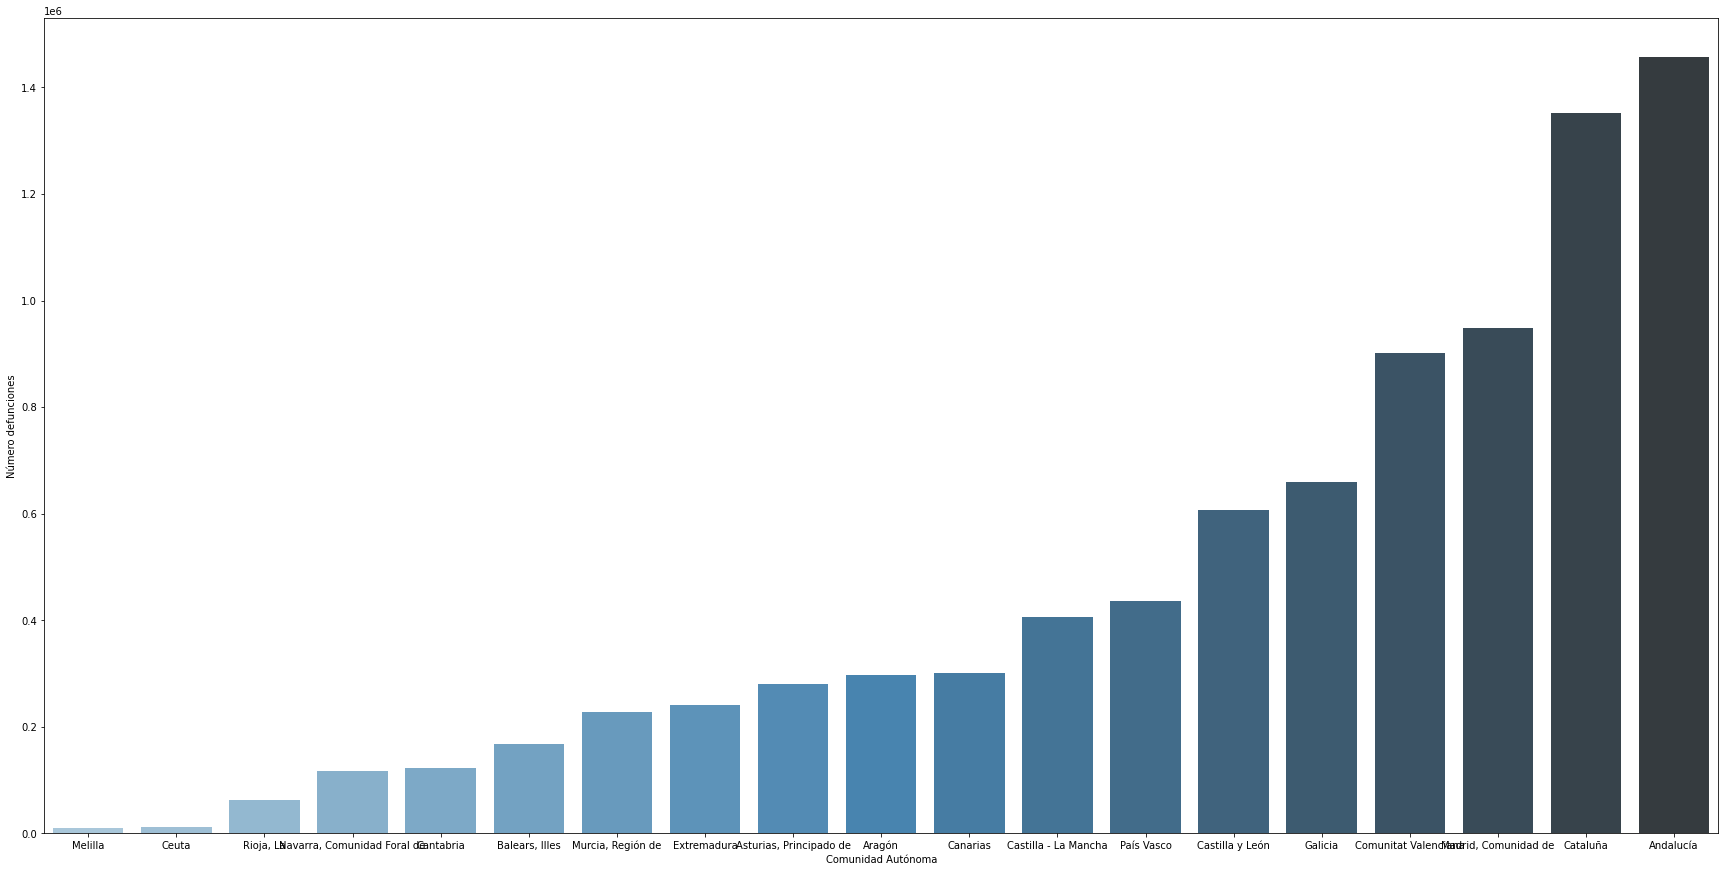

In [9]:
plt.figure(figsize=(30,15))
ax = sns.barplot(x = 'Comunidades autónomas',
           y = 'Total',
           palette = 'Blues_d',
           data = total)
ax.set(xlabel = 'Comunidad Autónoma', ylabel = 'Número defunciones')
plt.show()

In [10]:
d1= new[new['Comunidades autónomas'] == 'Andalucía'][90::-1]
d2= new[new['Comunidades autónomas'] == 'Aragón'][90::-1]
d3= new[new['Comunidades autónomas'] == 'Asturias, Principado de'][90::-1]
d4= new[new['Comunidades autónomas'] == 'Balears, Illes'][90::-1]
d5= new[new['Comunidades autónomas'] == 'Canarias'][90::-1]
d6= new[new['Comunidades autónomas'] == 'Cantabria'][90::-1]
d7= new[new['Comunidades autónomas'] == 'Castilla y León'][90::-1]
columna = d7['Total']
columna = np.where(columna > 200, columna, columna*1000)
d7['Total'] = columna

d8= new[new['Comunidades autónomas'] == 'Castilla - La Mancha'][90::-1]
columna = d8['Total']
columna = np.where(columna > 200, columna, columna*1000)
d8['Total'] = columna

d9= new[new['Comunidades autónomas'] == 'Cataluña'][90::-1]
d10= new[new['Comunidades autónomas'] == 'Comunitat Valenciana'][90::-1]
columna = d10['Total']
columna = np.where(columna > 200, columna, columna*1000)
d10['Total'] = columna

d11= new[new['Comunidades autónomas'] == 'Extremadura'][90::-1]
d12= new[new['Comunidades autónomas'] == 'Galicia'][90::-1]
d13= new[new['Comunidades autónomas'] == 'Madrid, Comunidad de'][90::-1]
columna = d13['Total']
columna = np.where(columna > 200, columna, columna*1000)
d13['Total'] = columna

d14= new[new['Comunidades autónomas'] == 'Murcia, Región de'][90::-1]
d15= new[new['Comunidades autónomas'] == 'Navarra, Comunidad Foral de'][90::-1]
d16= new[new['Comunidades autónomas'] == 'País Vasco'][90::-1]
d17= new[new['Comunidades autónomas'] == 'Rioja, La'][90::-1]
d18= new[new['Comunidades autónomas'] == 'Ceuta'][90::-1]
d19= new[new['Comunidades autónomas'] == 'Melilla'][90::-1]

lista_com = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19]

In [11]:
dates = list(d1['Periodo'])
new_dates = []
for i in dates:
    pal = i[6:] + '/' + i[2:4]
    new_dates.append(pal)

print(new_dates)

['01/20', '02/20', '03/20', '04/20', '05/20', '06/20', '07/20', '08/20', '09/20', '10/20', '11/20', '12/20', '13/20', '14/20', '15/20', '16/20', '17/20', '18/20', '19/20', '20/20', '21/20', '22/20', '23/20', '24/20', '25/20', '26/20', '27/20', '28/20', '29/20', '30/20', '31/20', '32/20', '33/20', '34/20', '35/20', '36/20', '37/20', '38/20', '39/20', '40/20', '41/20', '42/20', '43/20', '44/20', '45/20', '46/20', '47/20', '48/20', '49/20', '50/20', '51/20', '52/20', '53/20', '01/21', '02/21', '03/21', '04/21', '05/21', '06/21', '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '13/21', '14/21', '15/21', '16/21', '17/21', '18/21', '19/21', '20/21', '21/21', '22/21', '23/21', '24/21', '25/21', '26/21', '27/21', '28/21', '29/21', '30/21', '31/21', '32/21', '33/21', '34/21', '35/21', '36/21', '37/21', '38/21']


In [12]:
data = []

for i in lista_com:
  i.reset_index(inplace=True)
  trace = go.Scatter(
                    x = new_dates,
                    y = i['Total'],
                    name = i['Comunidades autónomas'][0],
                    mode= 'lines')
  data.append(trace)

layout = dict(title = 'Defunciones periodo 2019-2020 por comunidad',
             xaxis= dict(title= 'Defunciones Totales',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

fig.write_html(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'def_com_temp.html'))

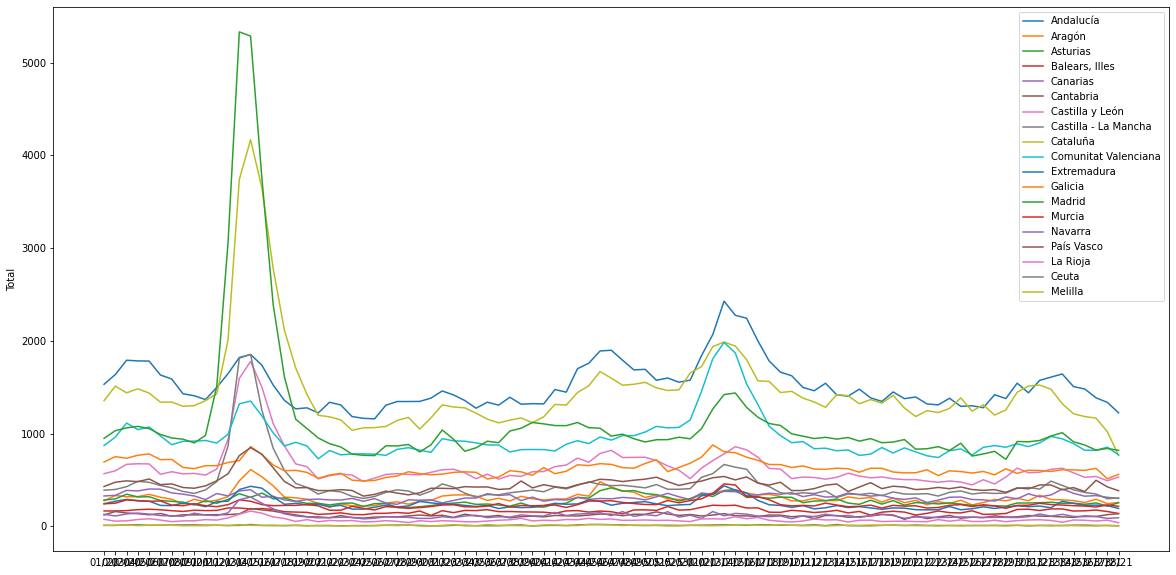

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(x = new_dates, y = d1['Total'], label = 'Andalucía');
sns.lineplot(x = new_dates, y = d2['Total'], label = 'Aragón');
sns.lineplot(x = new_dates, y = d3['Total'], label = 'Asturias');
sns.lineplot(x = new_dates, y = d4['Total'], label = 'Balears, Illes');
sns.lineplot(x = new_dates, y = d5['Total'], label = 'Canarias');
sns.lineplot(x = new_dates, y = d6['Total'], label = 'Cantabria');
sns.lineplot(x = new_dates, y = d7['Total'], label = 'Castilla y León');
sns.lineplot(x = new_dates, y = d8['Total'], label = 'Castilla - La Mancha');
sns.lineplot(x = new_dates, y = d9['Total'], label = 'Cataluña');
sns.lineplot(x = new_dates, y = d10['Total'], label = 'Comunitat Valenciana');
sns.lineplot(x = new_dates, y = d11['Total'], label = 'Extremadura');
sns.lineplot(x = new_dates, y = d12['Total'], label = 'Galicia');
sns.lineplot(x = new_dates, y = d13['Total'], label = 'Madrid');
sns.lineplot(x = new_dates, y = d14['Total'], label = 'Murcia');
sns.lineplot(x = new_dates, y = d15['Total'], label = 'Navarra');
sns.lineplot(x = new_dates, y = d16['Total'], label = 'País Vasco');
sns.lineplot(x = new_dates, y = d17['Total'], label = 'La Rioja');
sns.lineplot(x = new_dates, y = d18['Total'], label = 'Ceuta');
sns.lineplot(x = new_dates, y = d19['Total'], label = 'Melilla');
plt.legend()

In [14]:
new = df[(df['Tipo de dato'] == 'Acumulado en lo que va de año') & (df['Comunidades autónomas'] != 'Total Nacional')]
new['Total'] = new['Total'].astype(float)
new

C:\Users\Toni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Comunidades autónomas,Tipo de dato,Periodo,Total
5670,01 Andalucía,Acumulado en lo que va de año,2021SM38,59.150
5671,01 Andalucía,Acumulado en lo que va de año,2021SM37,57.926
5672,01 Andalucía,Acumulado en lo que va de año,2021SM36,56.588
5673,01 Andalucía,Acumulado en lo que va de año,2021SM35,55.200
5674,01 Andalucía,Acumulado en lo que va de año,2021SM34,53.719
...,...,...,...,...
88447,19 Melilla,Acumulado en lo que va de año,2000SM05,57.000
88448,19 Melilla,Acumulado en lo que va de año,2000SM04,50.000
88449,19 Melilla,Acumulado en lo que va de año,2000SM03,35.000
88450,19 Melilla,Acumulado en lo que va de año,2000SM02,23.000


In [15]:
d1= new[new['Comunidades autónomas'] == '01 Andalucía'][90::-1]
d2= new[new['Comunidades autónomas'] == '02 Aragón'][90::-1]
d3= new[new['Comunidades autónomas'] == '03 Asturias, Principado de'][90::-1]
d4= new[new['Comunidades autónomas'] == '04 Balears, Illes'][90::-1]
d5= new[new['Comunidades autónomas'] == '05 Canarias'][90::-1]
d6= new[new['Comunidades autónomas'] == '06 Cantabria'][90::-1]
d7= new[new['Comunidades autónomas'] == '07 Castilla y León'][90::-1]
columna = d7['Total']
columna = np.where(columna > 200, columna, columna*1000)
d7['Total'] = columna

d8= new[new['Comunidades autónomas'] == '08 Castilla - La Mancha'][90::-1]
columna = d8['Total']
columna = np.where(columna > 200, columna, columna*1000)
d8['Total'] = columna

d9= new[new['Comunidades autónomas'] == '09 Cataluña'][90::-1]
d10= new[new['Comunidades autónomas'] == '10 Comunitat Valenciana'][90::-1]
columna = d10['Total']
columna = np.where(columna > 200, columna, columna*1000)
d10['Total'] = columna

d11= new[new['Comunidades autónomas'] == '11 Extremadura'][90::-1]
d12= new[new['Comunidades autónomas'] == '12 Galicia'][90::-1]
d13= new[new['Comunidades autónomas'] == '13 Madrid, Comunidad de'][90::-1]
columna = d13['Total']
columna = np.where(columna > 200, columna, columna*1000)
d13['Total'] = columna

d14= new[new['Comunidades autónomas'] == '14 Murcia, Región de'][90::-1]
d15= new[new['Comunidades autónomas'] == '15 Navarra, Comunidad Foral de'][90::-1]
d16= new[new['Comunidades autónomas'] == '16 País Vasco'][90::-1]
d17= new[new['Comunidades autónomas'] == '17 Rioja, La'][90::-1]
d18= new[new['Comunidades autónomas'] == '18 Ceuta'][90::-1]
d19= new[new['Comunidades autónomas'] == '19 Melilla'][90::-1]

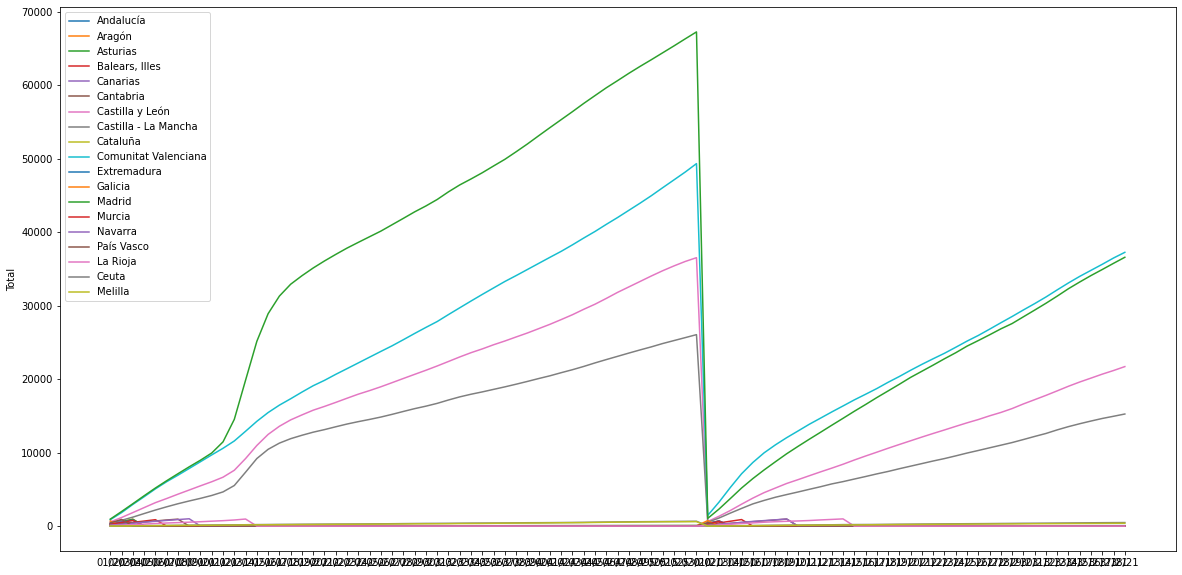

In [16]:
plt.figure(figsize=(20,10))
sns.lineplot(x = new_dates, y = d1['Total'], label = 'Andalucía');
sns.lineplot(x = new_dates, y = d2['Total'], label = 'Aragón');
sns.lineplot(x = new_dates, y = d3['Total'], label = 'Asturias');
sns.lineplot(x = new_dates, y = d4['Total'], label = 'Balears, Illes');
sns.lineplot(x = new_dates, y = d5['Total'], label = 'Canarias');
sns.lineplot(x = new_dates, y = d6['Total'], label = 'Cantabria');
sns.lineplot(x = new_dates, y = d7['Total'], label = 'Castilla y León');
sns.lineplot(x = new_dates, y = d8['Total'], label = 'Castilla - La Mancha');
sns.lineplot(x = new_dates, y = d9['Total'], label = 'Cataluña');
sns.lineplot(x = new_dates, y = d10['Total'], label = 'Comunitat Valenciana');
sns.lineplot(x = new_dates, y = d11['Total'], label = 'Extremadura');
sns.lineplot(x = new_dates, y = d12['Total'], label = 'Galicia');
sns.lineplot(x = new_dates, y = d13['Total'], label = 'Madrid');
sns.lineplot(x = new_dates, y = d14['Total'], label = 'Murcia');
sns.lineplot(x = new_dates, y = d15['Total'], label = 'Navarra');
sns.lineplot(x = new_dates, y = d16['Total'], label = 'País Vasco');
sns.lineplot(x = new_dates, y = d17['Total'], label = 'La Rioja');
sns.lineplot(x = new_dates, y = d18['Total'], label = 'Ceuta');
sns.lineplot(x = new_dates, y = d19['Total'], label = 'Melilla');
plt.legend()

In [17]:
new = df[(df['Tipo de dato'] == 'Variación anual del acumulado en lo que va de año') & (df['Comunidades autónomas'] != 'Total Nacional')]

nueva_columna = []
for i in new['Total']:
    if type(i) != float:
        nueva_columna.append(i.replace(',', '.'))
    else:
        nueva_columna.append(i)
new['Total'] = nueva_columna

C:\Users\Toni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
d1= new[new['Comunidades autónomas'] == '01 Andalucía'][90::-1]
d2= new[new['Comunidades autónomas'] == '02 Aragón'][90::-1]
d3= new[new['Comunidades autónomas'] == '03 Asturias, Principado de'][90::-1]
d4= new[new['Comunidades autónomas'] == '04 Balears, Illes'][90::-1]
d5= new[new['Comunidades autónomas'] == '05 Canarias'][90::-1]
d6= new[new['Comunidades autónomas'] == '06 Cantabria'][90::-1]
d7= new[new['Comunidades autónomas'] == '07 Castilla y León'][90::-1]
d8= new[new['Comunidades autónomas'] == '08 Castilla - La Mancha'][90::-1]
d9= new[new['Comunidades autónomas'] == '09 Cataluña'][90::-1]
d10= new[new['Comunidades autónomas'] == '10 Comunitat Valenciana'][90::-1]
d11= new[new['Comunidades autónomas'] == '11 Extremadura'][90::-1]
d12= new[new['Comunidades autónomas'] == '12 Galicia'][90::-1]
d13= new[new['Comunidades autónomas'] == '13 Madrid, Comunidad de'][90::-1]
d14= new[new['Comunidades autónomas'] == '14 Murcia, Región de'][90::-1]
d15= new[new['Comunidades autónomas'] == '15 Navarra, Comunidad Foral de'][90::-1]
d16= new[new['Comunidades autónomas'] == '16 País Vasco'][90::-1]
d17= new[new['Comunidades autónomas'] == '17 Rioja, La'][90::-1]
d18= new[new['Comunidades autónomas'] == '18 Ceuta'][90::-1]
d19= new[new['Comunidades autónomas'] == '19 Melilla'][90::-1]

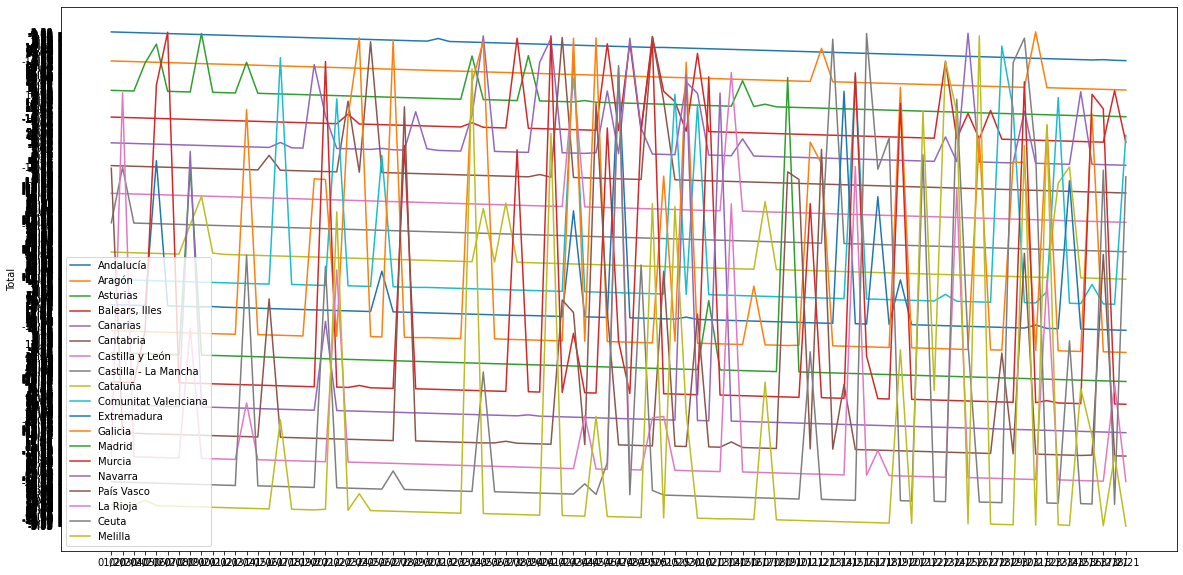

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(x = new_dates, y = d1['Total'], label = 'Andalucía');
sns.lineplot(x = new_dates, y = d2['Total'], label = 'Aragón');
sns.lineplot(x = new_dates, y = d3['Total'], label = 'Asturias');
sns.lineplot(x = new_dates, y = d4['Total'], label = 'Balears, Illes');
sns.lineplot(x = new_dates, y = d5['Total'], label = 'Canarias');
sns.lineplot(x = new_dates, y = d6['Total'], label = 'Cantabria');
sns.lineplot(x = new_dates, y = d7['Total'], label = 'Castilla y León');
sns.lineplot(x = new_dates, y = d8['Total'], label = 'Castilla - La Mancha');
sns.lineplot(x = new_dates, y = d9['Total'], label = 'Cataluña');
sns.lineplot(x = new_dates, y = d10['Total'], label = 'Comunitat Valenciana');
sns.lineplot(x = new_dates, y = d11['Total'], label = 'Extremadura');
sns.lineplot(x = new_dates, y = d12['Total'], label = 'Galicia');
sns.lineplot(x = new_dates, y = d13['Total'], label = 'Madrid');
sns.lineplot(x = new_dates, y = d14['Total'], label = 'Murcia');
sns.lineplot(x = new_dates, y = d15['Total'], label = 'Navarra');
sns.lineplot(x = new_dates, y = d16['Total'], label = 'País Vasco');
sns.lineplot(x = new_dates, y = d17['Total'], label = 'La Rioja');
sns.lineplot(x = new_dates, y = d18['Total'], label = 'Ceuta');
sns.lineplot(x = new_dates, y = d19['Total'], label = 'Melilla');
plt.legend()